# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [37]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


In [38]:
student_data.Age.values

array([17, 51, 27, 21, 36, 48, 19, 26, 54, 30])

In [39]:
student_data.Tardies.values

array([10,  1,  5,  9,  4,  2,  9,  6,  0,  3])

Draw a dispersion diagram (scatter plot) for the data.

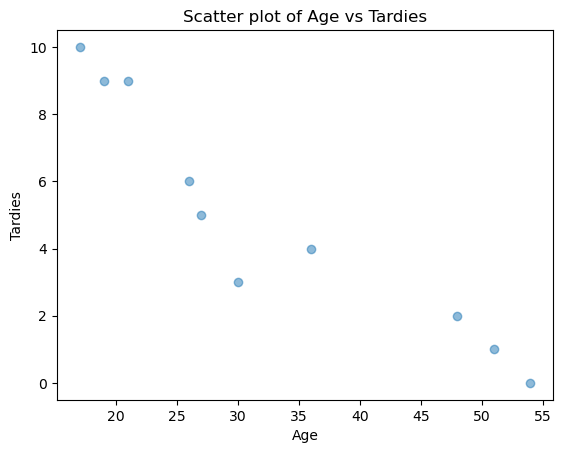

In [40]:
y1 = student_data.Tardies
X1 = student_data.Age.values.reshape(-1, 1)
plt.plot(X1, y1, "o", alpha=.5)
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Scatter plot of Age vs Tardies")
plt.show()

In [41]:
X = student_data[["Age"]] # need to be df
X

,Age
0,17
1,51
2,27
3,21
4,36
5,48
6,19
7,26
8,54
9,30


In [42]:
y = student_data["Tardies"] # need to be serie
y

0    10
1     1
2     5
3     9
4     4
5     2
6     9
7     6
8     0
9     3
Name: Tardies, dtype: int64

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

- We have a linear negative regression, this means when the age increse the number of tardies decrese.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [43]:
# Covariance and Correlation
cov_matrix = student_data.cov()
cor_matrix = student_data.corr()

# extract the values from the matrix
covariance = cov_matrix.iloc[0, 1]
correlation = cor_matrix.iloc[0, 1]

print(f"Covariance: {covariance}")
print(f"Correlation: {correlation}")


''' Difference between measures
- Covariance indicates the direction of the relationship (negative here) but is scale-dependent and the correlation is the standardized version between -1 and 1, indicating the strength of the relationship.

Compare their values
- Covariance is a large negative number -45.57, is hard to interpret on is own and the correlation is -0.939, which is much easier to read.

What do they tell you in this case?
- Both tell us there is an inverse relationship. The correlation of -0.939 tells us there is a very strong negative relationship: as age increases, tardies decrease significantly.'''

Covariance: -45.56666666666666
Correlation: -0.9391626886887121


' Difference between measures\n- Covariance indicates the direction of the relationship (negative here) but is scale-dependent and the correlation is the standardized version between -1 and 1, indicating the strength of the relationship.\n\nCompare their values\n- Covariance is a large negative number -45.57, is hard to interpret on is own and the correlation is -0.939, which is much easier to read.\n\nWhat do they tell you in this case?\n- Both tell us there is an inverse relationship. The correlation of -0.939 tells us there is a very strong negative relationship: as age increases, tardies decrease significantly.'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8, 1) (2, 1) (8,) (2,)


In [45]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

''' What will be your outcome variable?
- The outcome variable is 'Tardies'. It is the dependent variable we are trying to predict.
What type of regression are you using?
- Simple linear regression, it is simple because we are using only one predictor variable (Age) to predict the outcome.
Results interpretation:
- b0 = 13.46, b1 = -0.26: Tardies = 13.46 - 0.26 * Age (This means that for each year of age, the tardies decrease 0.26).'''

13.46408839779005 [-0.26657459]


" What will be your outcome variable?\n- The outcome variable is 'Tardies'. It is the dependent variable we are trying to predict.\nWhat type of regression are you using?\n- Simple linear regression, it is simple because we are using only one predictor variable (Age) to predict the outcome.\nResults interpretation:\n- b0 = 13.46, b1 = -0.26: Tardies = 13.46 - 0.26 * Age (This means that for each year of age, the tardies decrease 0.26)."

Plot your regression model on your scatter plot.

In [46]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
0.8038889848066298 -3.2925925643295164
MSE:
1.5688881215469614 1.073148141082379


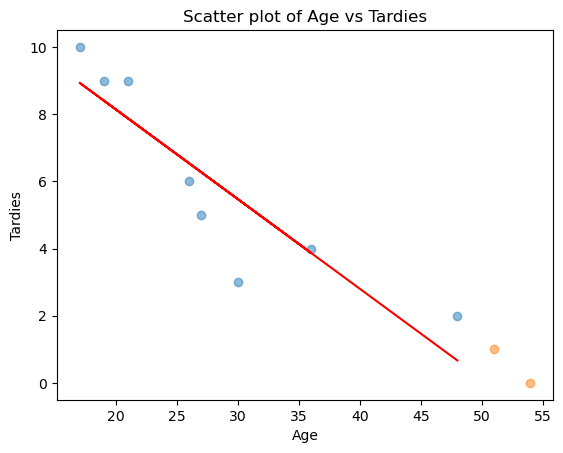

" What conclusions can you draw from your model?\n- The model shows a strong negative linear relationship between Age and Tardiness with a coefficient of -0.26, we conclude that for every additional year of age, a student is expected to have 0.26 fewer tardies. The intercept of 13.46 represents the theoretical starting point of tardies at age 0.\n\nHow confident in these conclusions are you?\n- I am highly confident in these conclusions because the Correlation Coefficient is very high (approx. -0.94) and the R-squared(Score) is likely above 0.80. This means the model explains over 80% of the variance in the data. The proximity of the data points to the regression line in the plot confirms this stability.\n\nCan we say that age is a good predictor of tardiness?\n- Yes, age is an excellent predictor of tardiness for this dataset. The strong correlation and the low Mean Squared Error(MSE), 1.56 for training, indicate that knowing a student's age allows us to estimate their tardiness with 

In [47]:
# Your code goes here
y_train_pred = lm.predict(X_train) # function to predict, can be from the test or from the train

plt.plot(X_train, y_train, "o", alpha=.5) # alpha in 0.5 to make a bit more transparent
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Scatter plot of Age vs Tardies")
plt.show()


''' What conclusions can you draw from your model?
- The model shows a strong negative linear relationship between Age and Tardiness with a coefficient of -0.26, we conclude that for every additional year of age, a student is expected to have 0.26 fewer tardies. The intercept of 13.46 represents the theoretical starting point of tardies at age 0.

How confident in these conclusions are you?
- I am highly confident in these conclusions because the Correlation Coefficient is very high (approx. -0.94) and the R-squared(Score) is likely above 0.80. This means the model explains over 80% of the variance in the data. The proximity of the data points to the regression line in the plot confirms this stability.

Can we say that age is a good predictor of tardiness?
- Yes, age is an excellent predictor of tardiness for this dataset. The strong correlation and the low Mean Squared Error(MSE), 1.56 for training, indicate that knowing a student's age allows us to estimate their tardiness with high accuracy. '''

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [48]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

In [49]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [50]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='str')

In [51]:
vehicles = vehicles[[#'Make', 'Model', 
    'Year', #'Engine Displacement', 
    'Cylinders', #'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 
    'Fuel Barrels/Year', #'City MPG', 'Highway MPG', 
    'Combined MPG','CO2 Emission Grams/Mile', 'Fuel Cost/Year']]
vehicles

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,244.000000,1100
35948,2014,3.0,9.155833,36,243.000000,1100
35949,2015,3.0,9.155833,36,244.000000,1100
35950,2016,3.0,9.155833,36,246.000000,1100


In [52]:
X = vehicles[["Fuel Barrels/Year","Year","Cylinders","Combined MPG","Fuel Cost/Year"]]
X

,Fuel Barrels/Year,Year,Cylinders,Combined MPG,Fuel Cost/Year
0,19.388824,1984,4.0,17,1950
1,25.354615,1984,6.0,13,2550
2,20.600625,1985,4.0,16,2100
3,25.354615,1985,6.0,13,2550
4,20.600625,1987,6.0,16,2550
...,...,...,...,...,...
35947,9.155833,2013,3.0,36,1100
35948,9.155833,2014,3.0,36,1100
35949,9.155833,2015,3.0,36,1100
35950,9.155833,2016,3.0,36,1100


In [53]:
y = vehicles["CO2 Emission Grams/Mile"]
y

0        522.764706
1        683.615385
2        555.437500
3        683.615385
4        555.437500
            ...    
35947    244.000000
35948    243.000000
35949    244.000000
35950    246.000000
35951    255.000000
Name: CO2 Emission Grams/Mile, Length: 35952, dtype: float64

In [54]:
# Covariance and Correlation pearson by default
cor_matrix = vehicles.corr()
display(cor_matrix)

'''Which variable do you think will be the most important in determining CO2 emissions? 
- The most important variable is Fuel Barrels/Year, with a strong positive correlation of 0.986189 and Combined MPG with a strong negative correlation of -0.926229.

Which provides the least amount of helpful information for determining CO2 emissions?
-  The one that provides the least amount of helpful information is the Year variable, with a week positive correlation on 0.222300.'''


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


'Which variable do you think will be the most important in determining CO2 emissions? \n- The most important variable is Fuel Barrels/Year, with a strong positive correlation of 0.986189 and Combined MPG with a strong negative correlation of -0.926229.\n\nWhich provides the least amount of helpful information for determining CO2 emissions?\n-  The one that provides the least amount of helpful information is the Year variable, with a week positive correlation on 0.222300.'

In [55]:
#double check with spearman
X.corrwith(vehicles['CO2 Emission Grams/Mile'], method="spearman")

Fuel Barrels/Year    0.995539
Year                -0.215108
Cylinders            0.788777
Combined MPG        -0.995258
Fuel Cost/Year       0.922723
dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28761, 5) (7191, 5) (28761,) (7191,)


In [57]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

coefficients = pd.DataFrame({"Feature": X.columns,"Coefficient": lm.coef_})
display(coefficients)

'''
- Type of regression: Multiple Linear Regression
- Multiple linear regression is used because we have one continuous outcome and multiple continuous predictors.'''

,Feature,Coefficient
0,Fuel Barrels/Year,19.231027
1,Year,-0.315587
2,Cylinders,1.794026
3,Combined MPG,-2.933573
4,Fuel Cost/Year,0.031971


'\n- Type of regression: Multiple Linear Regression\n- Multiple linear regression is used because we have one continuous outcome and multiple continuous predictors.'

In [58]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
0.9812190180453002 0.9794542628636335
MSE:
266.54309246433496 289.82774408137595


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [59]:
import statsmodels.api as sm
est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
display(est.summary())


'''
Interpretation:
- Fuel Barrels/Year is the most important predictor, as CO2 emissions are directly linked to fuel consumption. Combined MPG is also highly influential, showing a strong negative relationship with emissions
- Year is the least informative predictor.
- The condition number is large, 2.54e+03. This might indicate that there are strong multicollinearity (various fuel-related variables)
- We are confident in the conclusions because R-squared (99,9%) and Prob (F-statistic):	0.00 make the model strong.'''

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          4.960e+06
Date:                     Thu, 05 Feb 2026   Prob (F-statistic):                        0.00
Time:                             23:05:18   Log-Likelihood:                     -1.2174e+05
No. Observations:                    28761   AIC:                                  2.435e+05
Df Residuals:                        28756   BIC:                                  2.435e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    20.0363      0.066    305.443      0.000      19.908      20.165
Year                  0.0607      0.001     64.823      0.000       0.059       0.063
Cylinders             0.8274      0.090      9.227      0.000       0.652       1.003
Combined MPG         -2.9317      0.048    -61.407      0.000      -3.025      -2.838
Fuel Cost/Year        0.0289      0.001     53.559      0.000       0.028       0.030
==============================================================================
Omnibus:                    59660.012   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        276321985.860
Skew:                          17.692   Prob(JB):                         0.00
Kurtosis:                     481.883   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'\nInterpretation:\n- Fuel Barrels/Year is the most important predictor, as CO2 emissions are directly linked to fuel consumption. Combined MPG is also highly influential, showing a strong negative relationship with emissions\n- Year is the least informative predictor.\n- The condition number is large, 2.54e+03. This might indicate that there are strong multicollinearity (various fuel-related variables)\n- We are confident in the conclusions because R-squared (99,9%) and Prob (F-statistic):\t0.00 make the model strong.'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [60]:
party = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Atend': [1,2,4,4,5,7,8,13]})
party

,Invited,Atend
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [61]:
X = party.Invited.values.reshape(-1,1)
y = party.Atend

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6, 1) (2, 1) (6,) (2,)


In [63]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

-0.38023952095808244 [0.84730539]


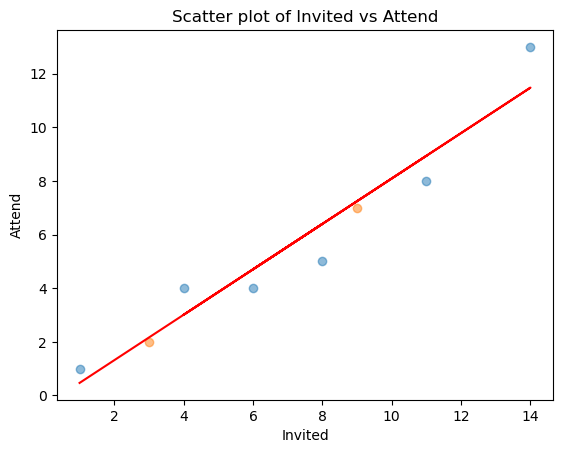

In [64]:

y_train_pred = lm.predict(X_train) # function to predict, can be from the test or from the train

plt.plot(X_train, y_train, "o", alpha=.5) # alpha in 0.5 to make a bit more transparent
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")
plt.xlabel("Invited")
plt.ylabel("Attend")
plt.title("Scatter plot of Invited vs Attend")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

- The regression results suggest that attendance increases at a slower rate than invitations. On average, each additional invitation results in fewer than one additional attendee (0.85), supporting the hypothesis that a larger fraction of invitees are unable to attend as the number of invitations increases.
- Visually, the regression line fits the data reasonably well, with most points lying close to the line, suggesting a fairly strong linear relationship.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [65]:
party_no_out = pd.DataFrame({'Invited_': [1,3,4,6,8,9,11], 'Atend_': [1,2,4,4,5,7,8]})
party_no_out

,Invited_,Atend_
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [66]:
X3 = party_no_out.Invited_.values.reshape(-1,1)
y3 = party_no_out.Atend_

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5, 1) (2, 1) (5,) (2,)


In [68]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)

0.8630136986301356 [0.62328767]


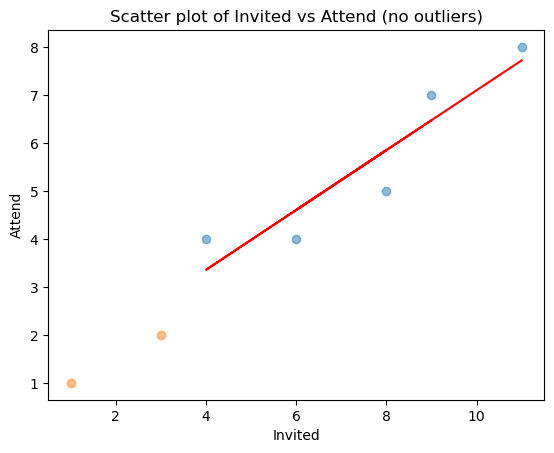

In [69]:
y_train_pred = lm.predict(X_train) # function to predict, can be from the test or from the train

plt.plot(X_train, y_train, "o", alpha=.5) # alpha in 0.5 to make a bit more transparent
plt.plot(X_test, y_test, "o", alpha=.5)
plt.plot(X_train, y_train_pred, "r")
plt.xlabel("Invited")
plt.ylabel("Attend")
plt.title("Scatter plot of Invited vs Attend (no outliers)")
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?


- After removing the most influential point, b0 = 0.86, b1 = 0.62: Invited people = 0.86 - 0.62 * Attend (This means that for each attendence, the invited people increase 0.62) vs with outliers - b0 = 0.38, b1 = 0.84: Invited people = 0.38 - 0.84 * Attend (This means that for each attendence, the invited people increase 0.84).
- It is probably due to the small database we are working with
